In [1]:
#!pip install xarray netcdf4

### Loading Data

/var/folders/bs/p8m_n1pj5xq_f1p787_22x6c0000gn/T/ipykernel_69862/593719488.py:26: Pandas4Warning: Sorting by default when concatenating all DatetimeIndex is deprecated.  In the future, pandas will respect the default of `sort=False`. Specify `sort=True` or `sort=False` to silence this message. If you see this warnings when not directly calling concat, report a bug to pandas.
  df = pd.concat([df_c, df_f, df_l], axis=1)


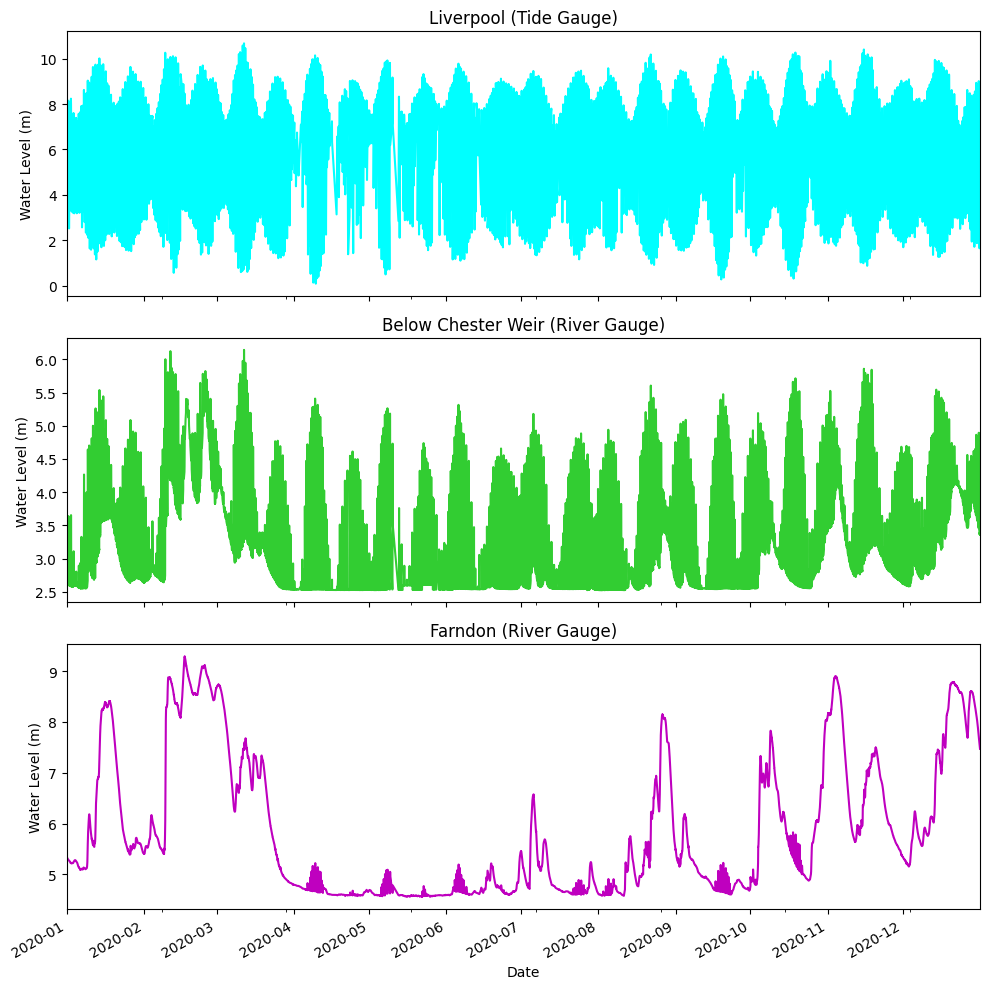

In [2]:
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

dir = "./data/"
ds_c = xr.open_dataset(dir + "ctr2_2020.nc")
ds_f = xr.open_dataset(dir + "farn_2020.nc")
ds_l = xr.open_dataset(dir + "liv_2020.nc")

# Convert datasets to pandas DataFrames with datetime index
df_c = ds_c.sea_level.to_dataframe().reset_index().set_index('time')
df_f = ds_f.sea_level.to_dataframe().reset_index().set_index('time')
df_l = ds_l.sea_level.to_dataframe().reset_index().set_index('time')

# Ensure the index is of datetime type
df_c.index = pd.to_datetime(df_c.index, utc = True)
df_f.index = pd.to_datetime(df_f.index, utc = True)
df_l.index = pd.to_datetime(df_l.index, utc = True)

# Rename the sea_level columns to distinguish them
df_c.rename(columns={'sea_level': 'observations'}, inplace=True)
df_f.rename(columns={'sea_level': 'River_level_upstream'}, inplace=True)
df_l.rename(columns={'sea_level': 'Liverpool'}, inplace=True)

# Combine all DataFrames into a single DataFrame
df = pd.concat([df_c, df_f, df_l], axis=1)


df = df.dropna()

# Plot the data
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10), sharex=True)

df['Liverpool'].plot(ax=axes[0], color='cyan')
axes[0].set_title('Liverpool (Tide Gauge)')
axes[0].set_ylabel('Water Level (m)')

df['observations'].plot(ax=axes[1], color='limegreen')
axes[1].set_title('Below Chester Weir (River Gauge)')
axes[1].set_ylabel('Water Level (m)')

df['River_level_upstream'].plot(ax=axes[2], color='m')
axes[2].set_title('Farndon (River Gauge)')
axes[2].set_ylabel('Water Level (m)')
axes[2].set_xlabel('Date')

axes[0].set_xlim(df.index[0], df.index[-1])
axes[1].set_xlim(df.index[0], df.index[-1])
axes[2].set_xlim(df.index[0], df.index[-1])

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

### Running RTide:

In [3]:
import rtide
from rtide import RTide

In [4]:
df = pd.concat([df_c, df_f], axis=1) ## here we are using the river outflow as an additional forcing function

df = df.dropna()

/var/folders/bs/p8m_n1pj5xq_f1p787_22x6c0000gn/T/ipykernel_69862/3047733808.py:1: Pandas4Warning: Sorting by default when concatenating all DatetimeIndex is deprecated.  In the future, pandas will respect the default of `sort=False`. Specify `sort=True` or `sort=False` to silence this message. If you see this warnings when not directly calling concat, report a bug to pandas.
  df = pd.concat([df_c, df_f], axis=1) ## here we are using the river outflow as an additional forcing function


In [5]:
model = RTide(df[:20000], lat = 53.1109, lon = -2.53175) ## let's assume we have access to the first 20,000 measurements.

When computing input functions we have two options: use the station location (fixed_location = False), or use a fixed location (fixed_location = True). The former has the advantage of faithfully representing the forcing and spherical harmonics at the station location. The disadvantage of this approach is that if one wants to compare the learned weights between two locations, the spherical harmonics can confound this. By default, if the user selects fixed_location, the forcing is taken from lat = 45, and lon = 0, which is a local maximum of the spherical harmonics.

In [6]:
import time
inputs = {
    'symmetrical': True,
    'sample_rate': 4,
    'path':'rivers',
    'fixed_location':True
}

model.Prepare_Inputs(**inputs)

#### Model Overview ####
Mode: elevation
Outputs: ['observations']
Learning Rate: 0.0001
Loss: MSE
Standard Epochs: 500
Regularization: 0.001
Number of Layers: 3
Has Exogenous Inputs (multi): True
Save Weights: True
Epoch 1/500


/opt/anaconda3/envs/rtide_testing/lib/python3.11/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


532/532 - 1s - 3ms/step - loss: 1.0923 - val_loss: 0.7314 - learning_rate: 1.0000e-04
Epoch 2/500
532/532 - 0s - 922us/step - loss: 0.6344 - val_loss: 0.6711 - learning_rate: 1.0000e-04
Epoch 3/500
532/532 - 0s - 891us/step - loss: 0.5970 - val_loss: 0.5908 - learning_rate: 1.0000e-04
Epoch 4/500
532/532 - 0s - 868us/step - loss: 0.5737 - val_loss: 0.5607 - learning_rate: 1.0000e-04
Epoch 5/500
532/532 - 0s - 833us/step - loss: 0.5534 - val_loss: 0.5516 - learning_rate: 1.0000e-04
Epoch 6/500
532/532 - 0s - 878us/step - loss: 0.5395 - val_loss: 0.5312 - learning_rate: 1.0000e-04
Epoch 7/500
532/532 - 0s - 874us/step - loss: 0.5278 - val_loss: 0.5290 - learning_rate: 1.0000e-04
Epoch 8/500
532/532 - 0s - 889us/step - loss: 0.5134 - val_loss: 0.5056 - learning_rate: 1.0000e-04
Epoch 9/500
532/532 - 0s - 874us/step - loss: 0.4994 - val_loss: 0.4873 - learning_rate: 1.0000e-04
Epoch 10/500
532/532 - 1s - 1ms/step - loss: 0.4904 - val_loss: 0.5178 - learning_rate: 1.0000e-04
Epoch 11/500
53

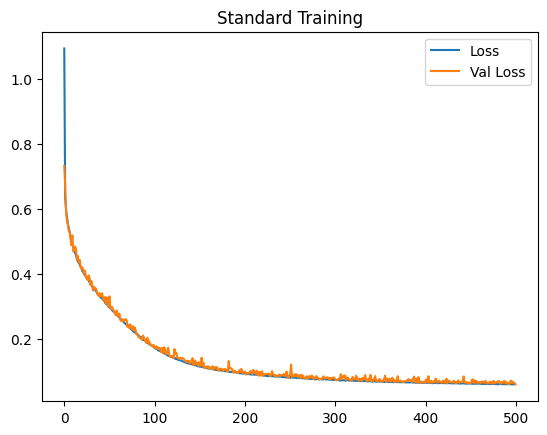

625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step


/opt/anaconda3/envs/rtide_testing/lib/python3.11/site-packages/utide/_time_conversion.py:26: UserWarning: no explicit representation of timezones available for np.datetime64
  date = date.astype("datetime64[ms]")


In [7]:
train_inputs = {
    'loss' : 'MSE',
    'lr' : 1e-04,
    'standard_epochs' : 500,
    'hidden_nodes' : 'standard',
    'depth' : 3,
    'early_stoppage' : 50,
    'save_weights' : True,
    'regularization_strength' : 0.001,
    'featurewise_X_scaling':True, ## scale independent features separately. Preferable if including different processes with diff magnitudes.
}

model.Train(**train_inputs)

In [8]:
model.Predict(df[19500:24500])

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step


/opt/anaconda3/envs/rtide_testing/lib/python3.11/site-packages/utide/_time_conversion.py:26: UserWarning: no explicit representation of timezones available for np.datetime64
  date = date.astype("datetime64[ms]")


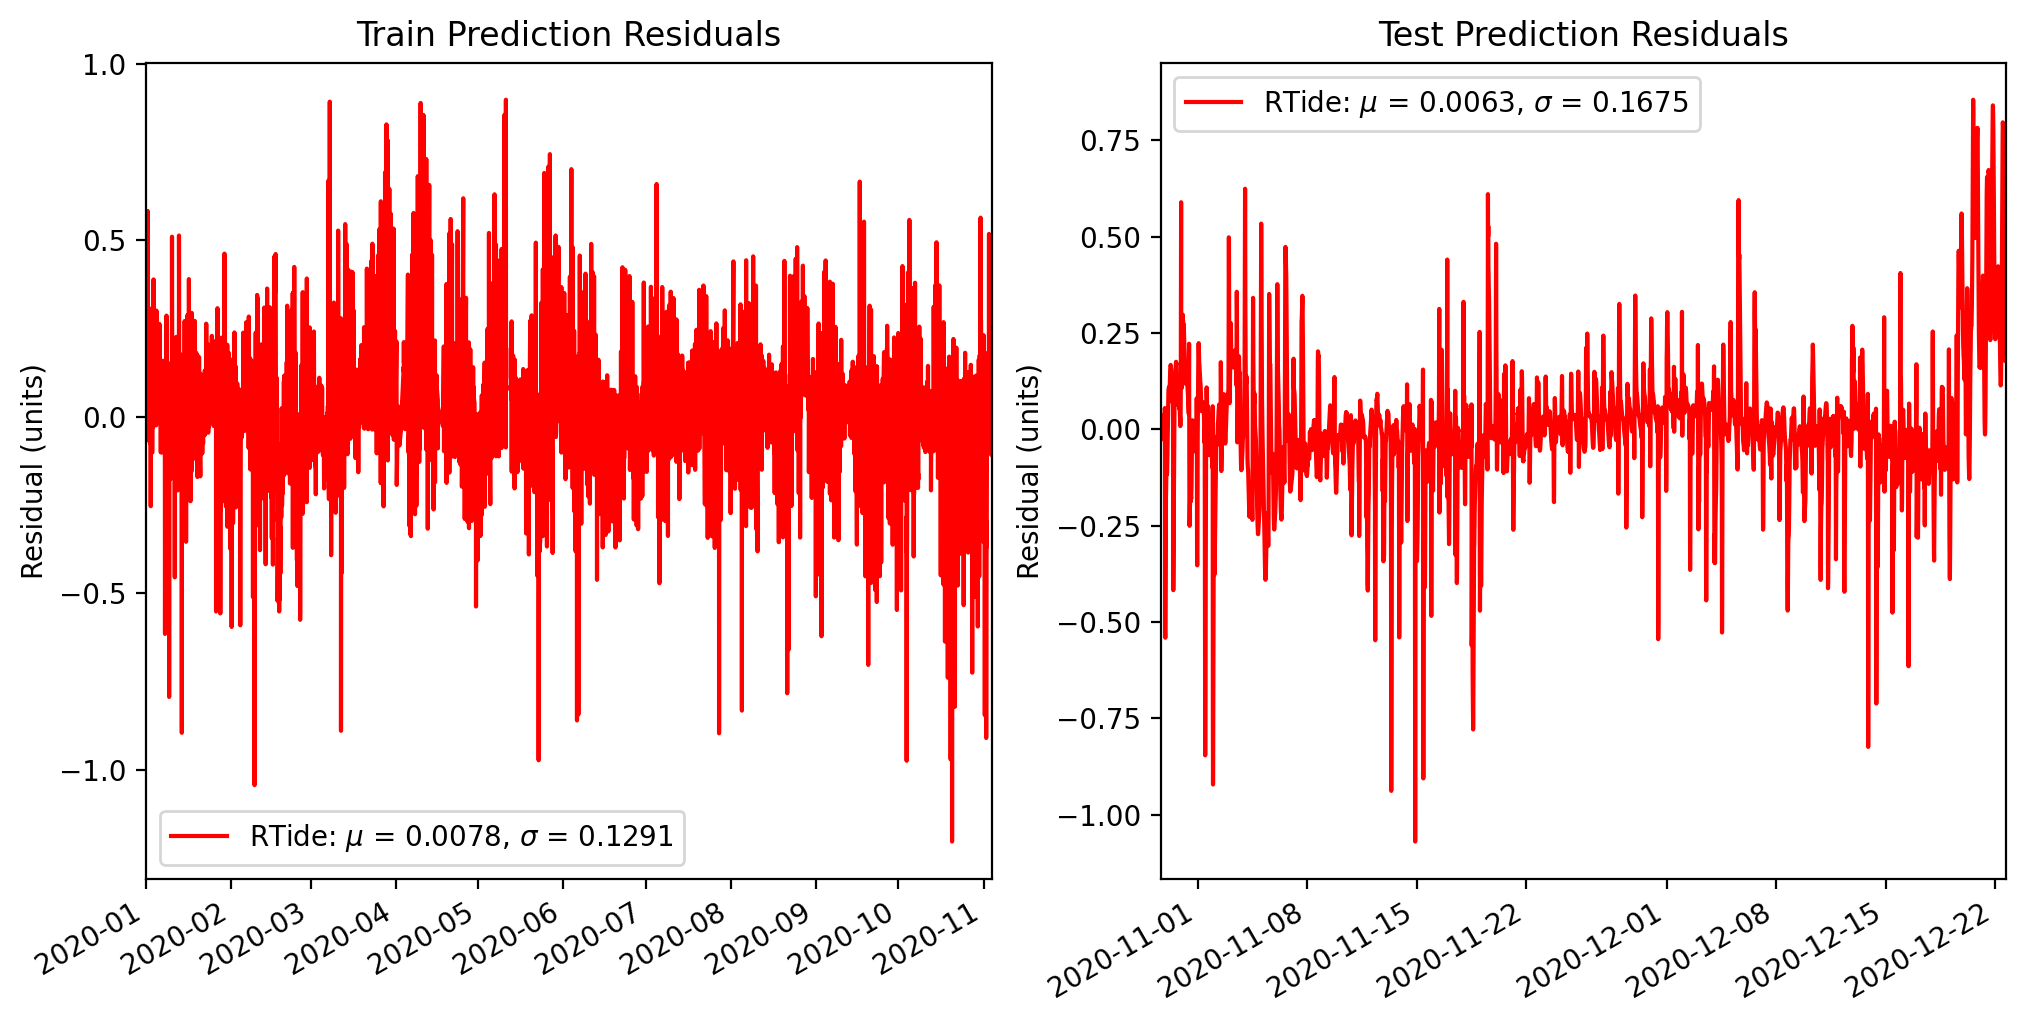

In [9]:
model.Visualize_Residuals()

Train Results
r2: 0.9704665986247024 MSE: 0.016715283804195145 MAE : 0.0836056206205368 MAPE : 0.02438346766198269
Test Results
r2: 0.9403249374559207 MSE: 0.028109608017766904 MAE : 0.10516564840202332 MAPE : 0.02805938628963189


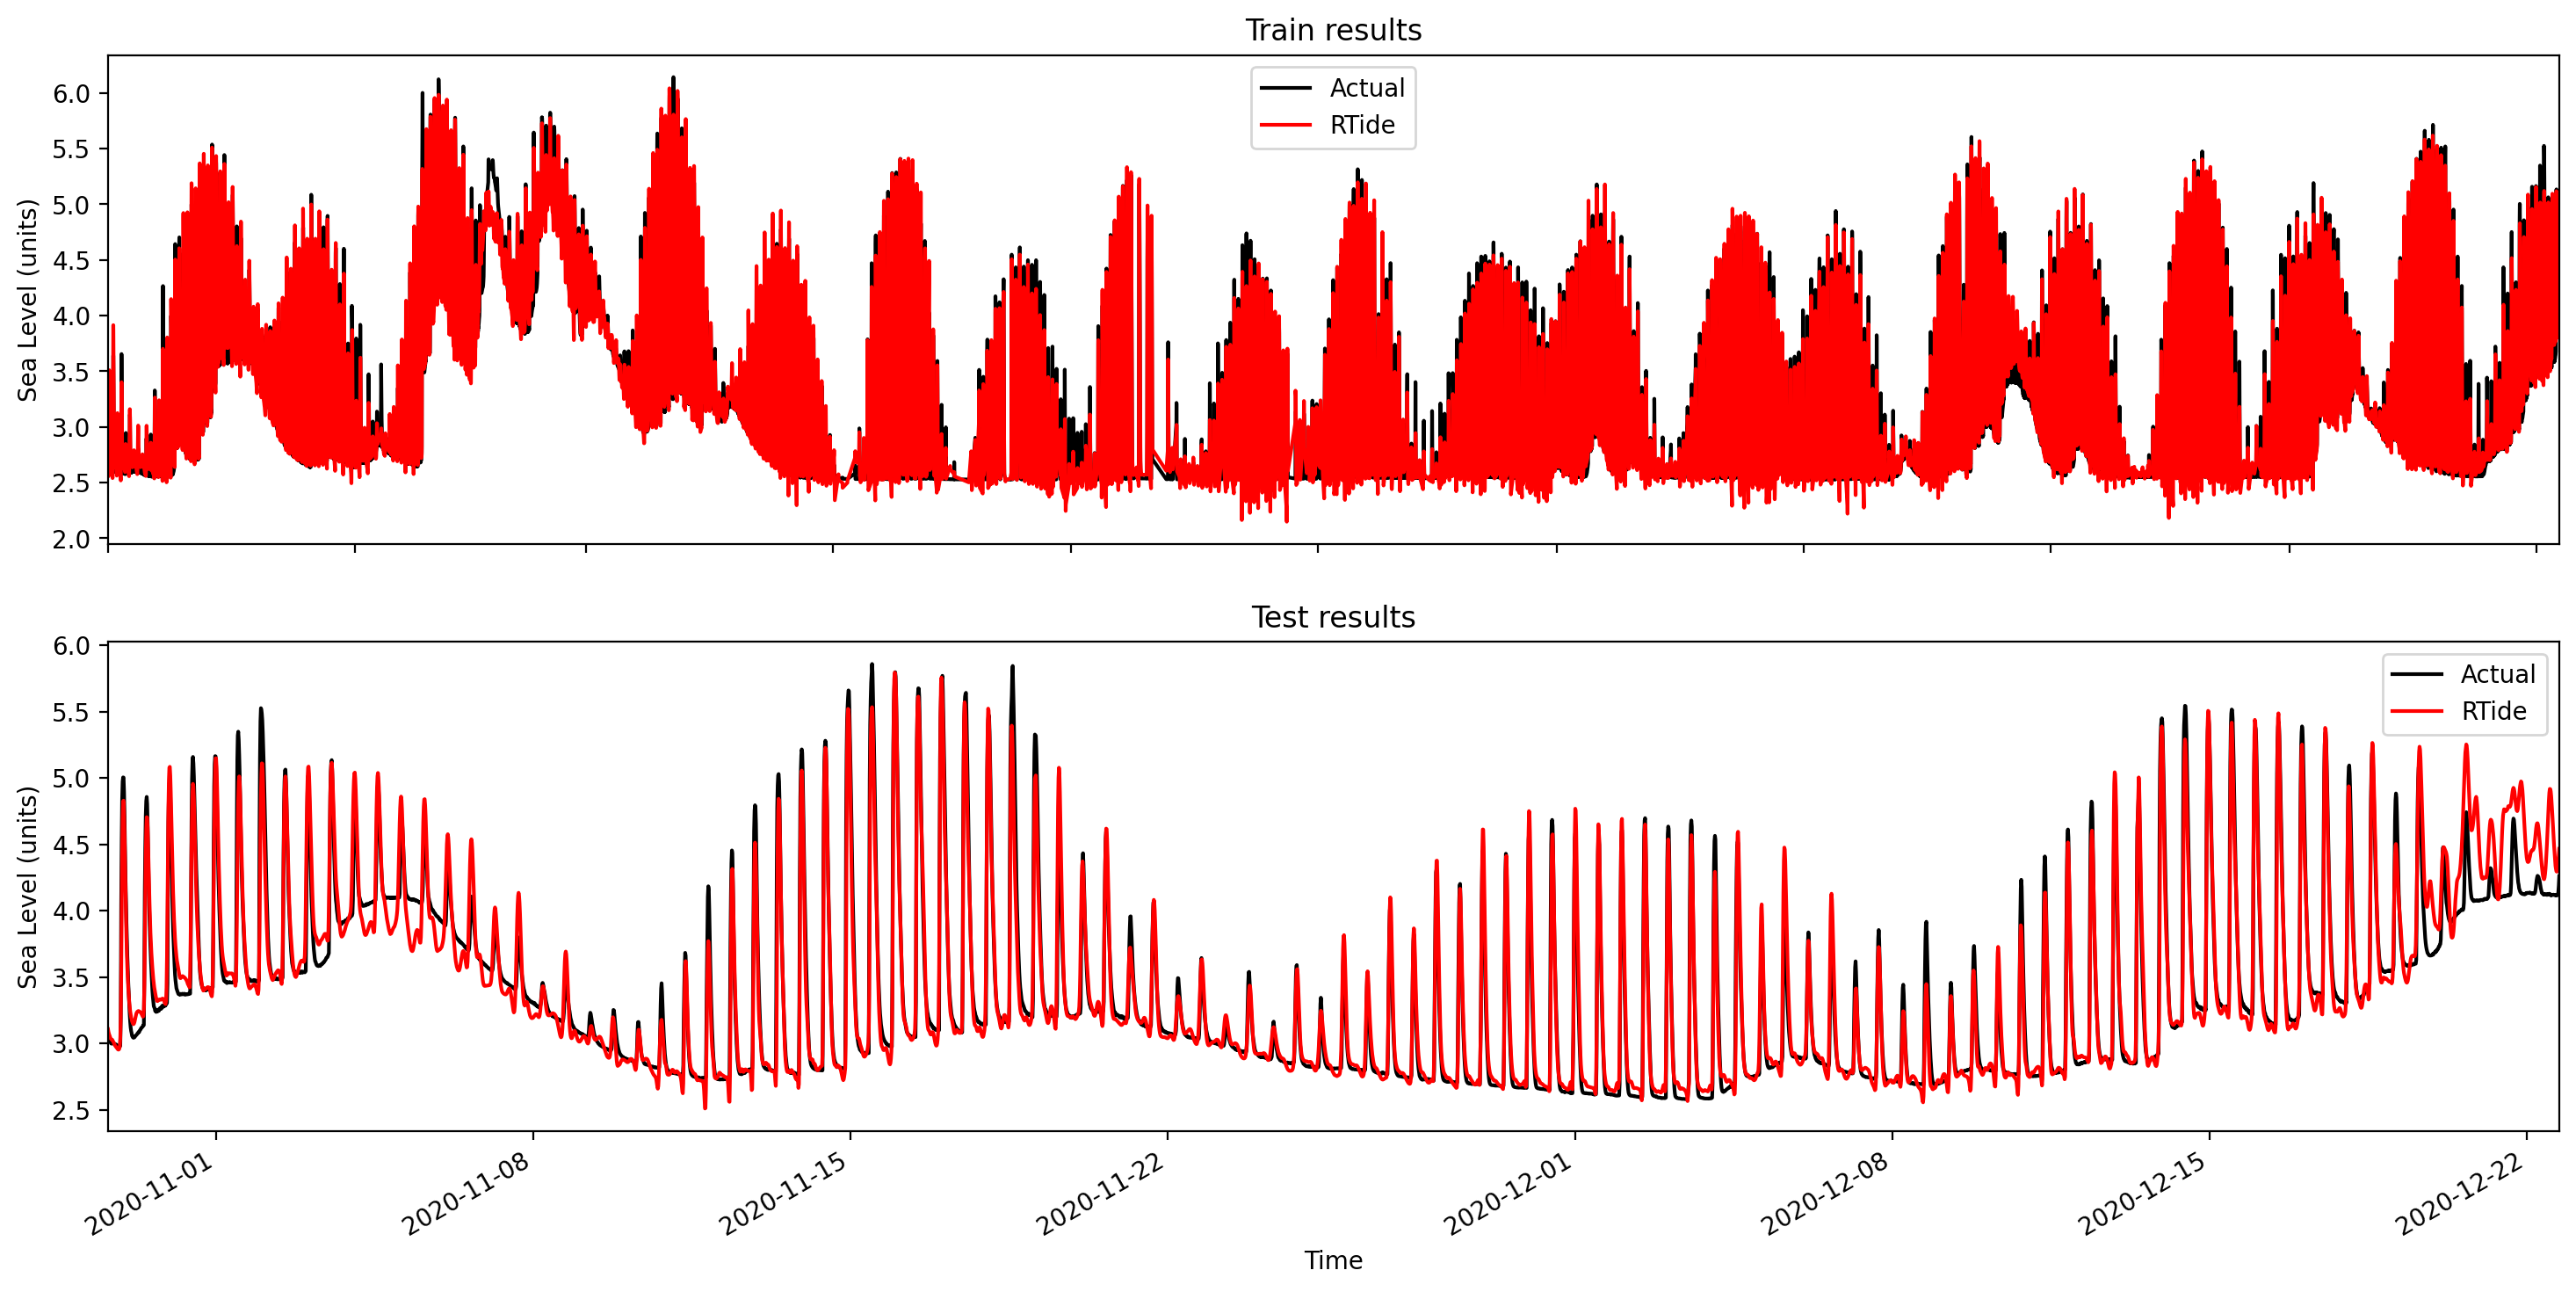

In [10]:
figy = model.Visualize_Predictions(returnfig = True)
#plt.savefig('insitu_river_model.png', dpi = 300, bbox_inches = 'tight') #if you want to save the figure.

### SHAP Analysis

Here, we compute the SHAP analysis for a randomly drawn subset of the test dataset. SHAP computation time scales with the number of datapoints predicted. For quick analyses, randomly sampling can increase representation of the dataset without incurring computational overhead.

In [11]:
import random
model.Predict(df.iloc[random.sample(range(19500,24500), 125)].sort_index())

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/opt/anaconda3/envs/rtide_testing/lib/python3.11/site-packages/utide/_time_conversion.py:26: UserWarning: no explicit representation of timezones available for np.datetime64
  date = date.astype("datetime64[ms]")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


  0%|          | 0/125 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

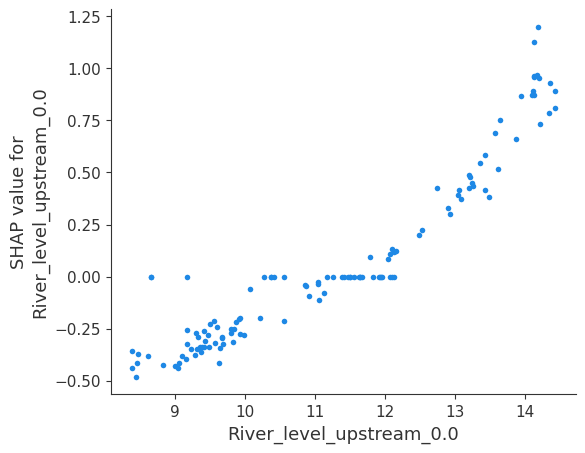

In [12]:
model.Shap_Analysis(plot=True)